In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import warnings
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')


In [2]:
# Importing the first dataset
df = pd.read_csv ("pdb_data_no_dups.csv")
df.head(2)

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141401 entries, 0 to 141400
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   structureId               141401 non-null  object 
 1   classification            141399 non-null  object 
 2   experimentalTechnique     141401 non-null  object 
 3   macromoleculeType         137636 non-null  object 
 4   residueCount              141401 non-null  int64  
 5   resolution                128589 non-null  float64
 6   structureMolecularWeight  141401 non-null  float64
 7   crystallizationMethod     96242 non-null   object 
 8   crystallizationTempK      97039 non-null   float64
 9   densityMatthews           124724 non-null  float64
 10  densityPercentSol         124749 non-null  float64
 11  pdbxDetails               118534 non-null  object 
 12  phValue                   105110 non-null  float64
 13  publicationYear           117602 non-null  f

structureId                     0
classification                  2
experimentalTechnique           0
macromoleculeType            3765
residueCount                    0
resolution                  12812
structureMolecularWeight        0
crystallizationMethod       45159
crystallizationTempK        44362
densityMatthews             16677
densityPercentSol           16652
pdbxDetails                 22867
phValue                     36291
publicationYear             23799
dtype: int64

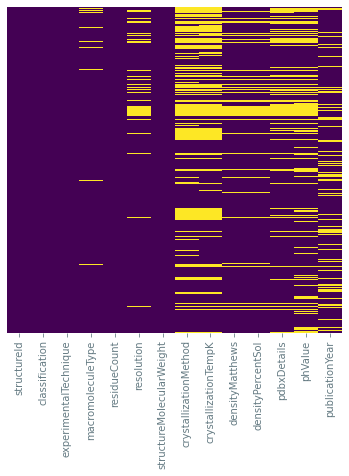

In [3]:
df.info()
# calculate duplicates
dups = df.duplicated()
# report if there are any duplicates
print(dups.any())
# # list all duplicate rows

print("Duplicate Rows",df[dups])
#Cardinality 
df.nunique() # To determine the maximum and minimum number of variations in each column of the dataset
#Lets now check for null fields
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.isnull().sum()


In [4]:
# Importing the second dataset
df1 = pd.read_csv ("pdb_data_seq.csv")
df1.head()

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467304 entries, 0 to 467303
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   structureId        467304 non-null  object
 1   chainId            467294 non-null  object
 2   sequence           467276 non-null  object
 3   residueCount       467304 non-null  int64 
 4   macromoleculeType  432487 non-null  object
dtypes: int64(1), object(4)
memory usage: 17.8+ MB
False
 * Duplicate Rows * Empty DataFrame
Columns: [structureId, chainId, sequence, residueCount, macromoleculeType]
Index: []


structureId              0
chainId                 10
sequence                28
residueCount             0
macromoleculeType    34817
dtype: int64

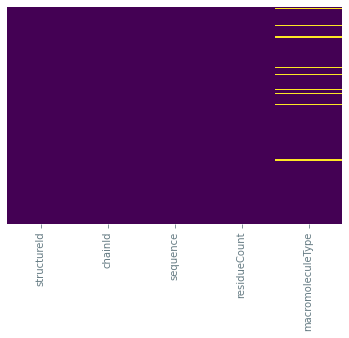

In [5]:
df1.info()
# calculate duplicates
dups = df1.duplicated()
# report if there are any duplicates
print(dups.any())
# list all duplicate rows

print(" * Duplicate Rows *",df1[dups])
#Cardinality 
df1.nunique() # To determine the maximum and minimum number of variations in each column of the dataset
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df1.isnull().sum()

In [6]:
# Merging the two datasets
df2 = df.set_index('structureId').merge(df1.set_index('structureId'),on='structureId',how='left')
df2.head()

,classification,experimentalTechnique,macromoleculeType_x,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear,chainId,sequence,residueCount_y,macromoleculeType_y
structureId,,,,,,,,,,,,,,,,,
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,A,CCGGCGCCGG,20.0,DNA/RNA Hybrid
100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0,B,CCGGCGCCGG,20.0,DNA/RNA Hybrid
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,A,CGCGAATTCGCG,24.0,DNA
101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0,B,CGCGAATTCGCG,24.0,DNA
101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154.0,Protein


In [7]:
# Clearing the classification column.
df2["classification"]=df2["classification"].str.replace('\n','')
df2["classification"]=df2["classification"].str.replace('\r','')
df2["classification"]=df2["classification"].str.replace('-','')
df2["classification"]=df2["classification"].str.replace(',','')
df2["classification"]=df2["classification"].str.replace('/','')
df2["classification"]=df2["classification"].str.replace(' ','')
# Clearing the experimentalTechnique column.
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('\n','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('\r','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('-','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace(',','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace('/','')
df2["experimentalTechnique"]=df2["experimentalTechnique"].str.replace(' ','')

In [8]:
df2.describe()

,residueCount_x,resolution,structureMolecularWeight,crystallizationTempK,densityMatthews,densityPercentSol,phValue,publicationYear,residueCount_y
count,471811.000000,449845.000000,4.718110e+05,317806.000000,390156.000000,390278.000000,340901.000000,414031.000000,471149.00000
mean,6249.411993,3.020053,9.249303e+05,290.882456,2.850614,54.196381,6.830511,2010.458932,6257.93182
std,23602.912835,3.090108,3.016951e+06,8.903673,0.824283,10.269266,2.461170,7.035084,23618.38381
min,0.000000,0.480000,3.143800e+02,4.000000,0.000000,0.000000,0.000000,201.000000,0.00000
25%,456.000000,2.000000,5.261474e+04,291.000000,2.320000,46.890000,6.100000,2007.000000,456.00000
50%,1140.000000,2.500000,1.308344e+05,293.000000,2.670000,53.950000,7.000000,2012.000000,1140.00000
75%,4518.000000,3.100000,6.331348e+05,295.000000,3.190000,61.360000,7.500000,2015.000000,4528.00000
max,313236.000000,70.000000,9.773054e+07,398.000000,99.000000,92.000000,724.000000,2018.000000,313236.00000


In [9]:
print(" The shape of the protein dataset is: " +str(df2.shape))
# So we have > 400,000 observations (rows) and 17 features (columns)
print(df.max())

 The shape of the protein dataset is: (471811, 17)
structureId                                            9XIM
experimentalTechnique       X-RAY DIFFRACTION, SOLUTION NMR
residueCount                                         313236
resolution                                             70.0
structureMolecularWeight                         97730536.0
crystallizationTempK                                  398.0
densityMatthews                                        99.0
densityPercentSol                                      92.0
phValue                                               724.0
publicationYear                                      2018.0
dtype: object


In [10]:
df2.isnull().sum()

classification                   4
experimentalTechnique            0
macromoleculeType_x          36432
residueCount_x                   0
resolution                   21966
structureMolecularWeight         0
crystallizationMethod       156948
crystallizationTempK        154005
densityMatthews              81655
densityPercentSol            81533
pdbxDetails                  86147
phValue                     130910
publicationYear              57780
chainId                        672
sequence                       690
residueCount_y                 662
macromoleculeType_y          36432
dtype: int64

In [11]:
# Data Cleaning¶
# Drop unwanted columns(not relevant for our model)
df3 = df2.drop(['publicationYear', 'chainId','macromoleculeType_x', 'macromoleculeType_y'], axis = 1)
df3.shape
# Data Cleaning - Summing NA values per column
print(df2.isnull().sum())
# Drop na observations
df_new=df3.dropna(how='any')
print(df_new.isnull().sum())
df_new.head(2)

classification                   4
experimentalTechnique            0
macromoleculeType_x          36432
residueCount_x                   0
resolution                   21966
structureMolecularWeight         0
crystallizationMethod       156948
crystallizationTempK        154005
densityMatthews              81655
densityPercentSol            81533
pdbxDetails                  86147
phValue                     130910
publicationYear              57780
chainId                        672
sequence                       690
residueCount_y                 662
macromoleculeType_y          36432
dtype: int64
classification              0
experimentalTechnique       0
residueCount_x              0
resolution                  0
structureMolecularWeight    0
crystallizationMethod       0
crystallizationTempK        0
densityMatthews             0
densityPercentSol           0
pdbxDetails                 0
phValue                     0
sequence                    0
residueCount_y              0
dt

,classification,experimentalTechnique,residueCount_x,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,sequence,residueCount_y
structureId,,,,,,,,,,,,,
102D,DNA,XRAYDIFFRACTION,24,2.2,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,CGCAAATTTGCG,24.0
102D,DNA,XRAYDIFFRACTION,24,2.2,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,CGCAAATTTGCG,24.0


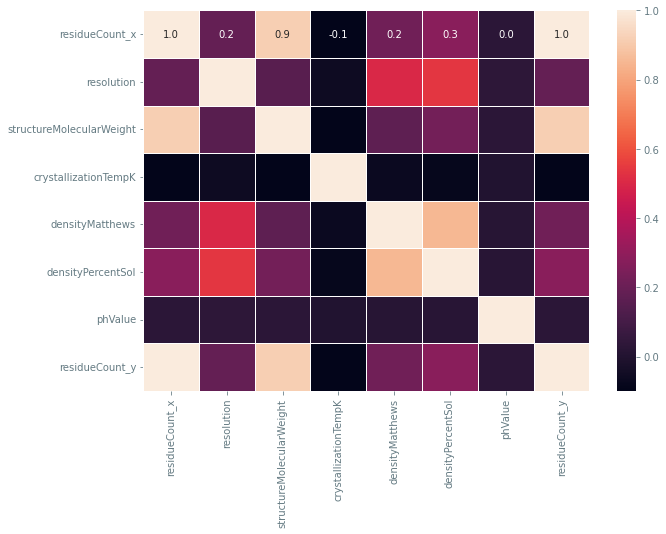

In [12]:
#correlation matrix
corrmat = df3.corr()
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corrmat, annot=True, linewidths=.5, fmt= '.1f',ax=ax);

In [13]:
# Removing correlated features: residueCount and densityMatthews
df4 = df_new.drop(['residueCount_x', 'residueCount_y','densityMatthews'],axis=1)
df4.shape

(264224, 10)

# EDA

<Axes: xlabel='phValue', ylabel='count'>

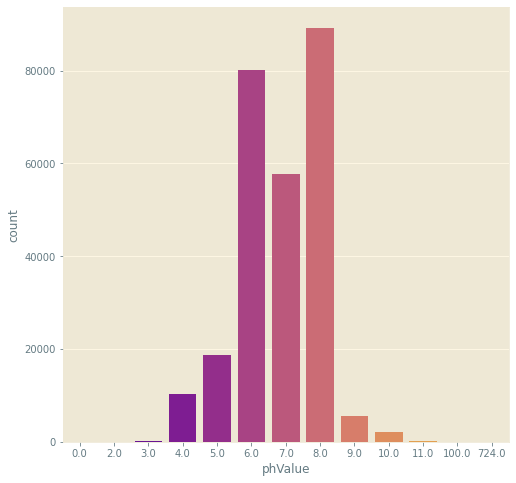

In [14]:
# Verifying the phValue
df4.phValue = df4.phValue.round()
plt.figure(figsize=(8,8))
sns.countplot(data=df4,x = df4['phValue'],palette='plasma')

> Significance of pH

 The pH range where proteins work best is neutral (pH 7) plus one and minus one.

<Axes: >

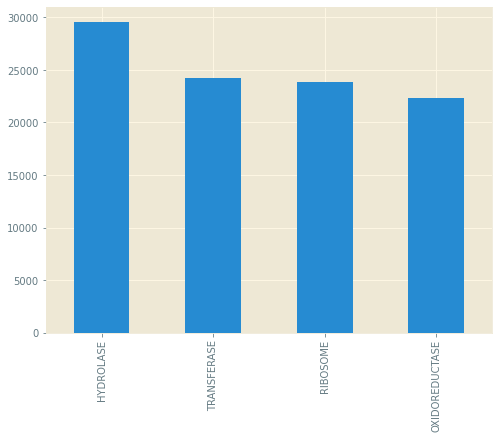

In [15]:
plt.figure(figsize=(8,6))
df4['classification'].value_counts()[:4].plot(kind='bar')

In [16]:
# Selecting families with count > 15000
counts = df4.classification.value_counts()
print(counts)
class_data = np.asarray(counts[(counts > 15000)].index)
class_data = df4[df4.classification.isin(class_data)]
# Checking new dataframe for top protein family names
class_data.classification.value_counts()

HYDROLASE                         29559
TRANSFERASE                       24236
RIBOSOME                          23858
OXIDOREDUCTASE                    22287
IMMUNESYSTEM                      10876
                                  ...  
LIGASESUBSTRATE                       1
TranscriptionHormone                  1
LIGASEReactionintermediate            1
BloodCoagulationOXIDOREDUCTASE        1
lipidtransportactivator               1
Name: classification, Length: 2434, dtype: int64


HYDROLASE         29559
TRANSFERASE       24236
RIBOSOME          23858
OXIDOREDUCTASE    22287
Name: classification, dtype: int64

In [17]:
class_data.dtypes 
# Converting all the categorical features to numerical
cat_transformer = OrdinalEncoder()
cat_features = ['crystallizationMethod', 'experimentalTechnique','pdbxDetails','sequence', 'classification']
transformed_cat = cat_transformer.fit_transform(class_data[cat_features])
class_data[cat_features] = transformed_cat
class_data.head(5)

,classification,experimentalTechnique,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityPercentSol,pdbxDetails,phValue,sequence
structureId,,,,,,,,,,
1A72,1.0,4.0,2.6,40658.50,119.0,277.0,46.82,18151.0,8.0,19585.0
1AR4,1.0,4.0,1.9,45428.53,191.0,277.0,32.00,22390.0,6.0,1616.0
1AR4,1.0,4.0,1.9,45428.53,191.0,277.0,32.00,22390.0,6.0,1616.0
1AR5,1.0,4.0,1.6,45430.34,191.0,277.0,32.20,22394.0,6.0,1616.0
1AR5,1.0,4.0,1.6,45430.34,191.0,277.0,32.20,22394.0,6.0,1616.0


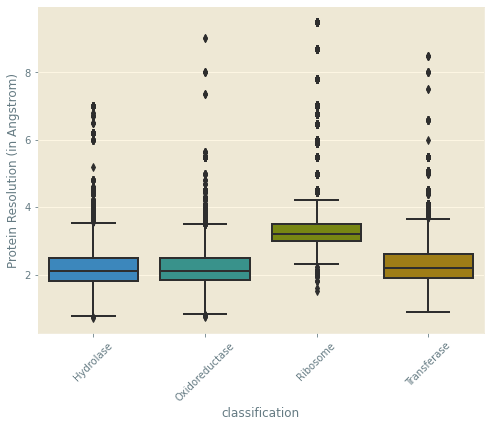

In [18]:
# Boxplot for visualizing the resolution feature
plt.figure(figsize=(8,6))
sns.boxplot(x=class_data["classification"], y=class_data["resolution"], data=pd.melt(class_data))
plt.ylabel("Protein Resolution (in Angstrom)", fontsize = 12)
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
plt.show()


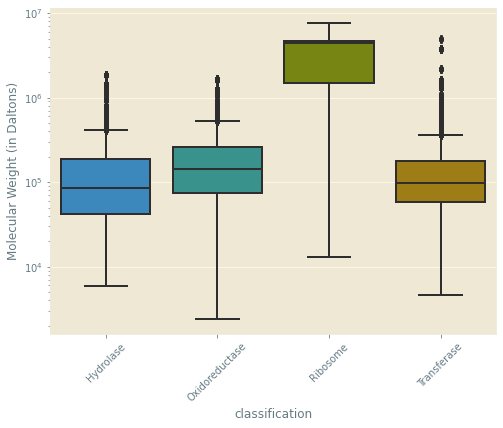

In [19]:
# Comparing the molecular weights of the top 4 protein families using a boxplot
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=class_data["classification"], y=class_data["structureMolecularWeight"], data=pd.melt(class_data))
ax.set_yscale('log')
plt.ylabel("Molecular Weight (in Daltons)", fontsize = 12)
plt.xticks([0, 1, 2, 3], ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"], rotation = 45)
plt.show()

> Obseravation

 Higher molecular weight and more readily identifiable ribosomes

# Classification

In [20]:
from sklearn import preprocessing
from sklearn.metrics import classification_report
min_max_scaler = preprocessing.MinMaxScaler()
X = class_data.drop(['classification', 'experimentalTechnique','pdbxDetails', "resolution", "densityPercentSol"],axis=1) 
y = class_data.classification
X_minmax = min_max_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
print(X.columns)

Index(['structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'phValue', 'sequence'],
      dtype='object')


In [21]:
knn = KNeighborsClassifier()
params = {'n_neighbors': np.arange(1,25,1) }
clf = GridSearchCV(knn, params, cv=10)
clf.fit(X_train,y_train)
print(clf.best_score_)

0.941452360013653


In [22]:
# Find the best k parameter
print("The best k parameter is : " + str(clf.best_params_))
print("Accuracy: " + str(clf.best_estimator_.score(X_test, y_test)))

The best k parameter is : {'n_neighbors': 1}
Accuracy: 0.9483690214128477


Text(0, 0.5, 'Mean Error')

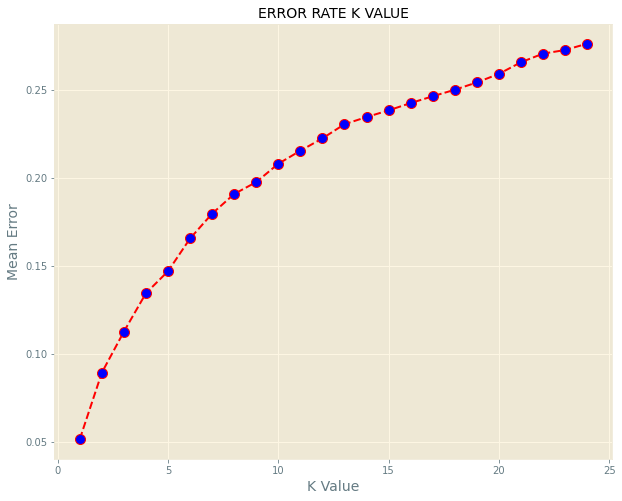

In [23]:
# Calculating error for K values between 1 and 25
error = []
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,8))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('ERROR RATE K VALUE',fontsize = 14 )
plt.xlabel('K Value', fontsize = 14 )
plt.ylabel('Mean Error', fontsize = 14 )


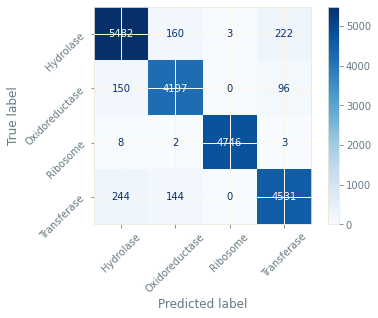

                precision    recall  f1-score   support

     Hydrolase       0.93      0.93      0.93      5867
Oxidoreductase       0.93      0.94      0.94      4443
      Ribosome       1.00      1.00      1.00      4759
   Transferase       0.93      0.92      0.93      4919

      accuracy                           0.95     19988
     macro avg       0.95      0.95      0.95     19988
  weighted avg       0.95      0.95      0.95     19988



In [24]:
# Based on the above graph, K=1 gives us the lowest mean error (5 features finally!)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
plot_confusion_matrix(knn1,X_test,y_test,cmap=plt.cm.Blues,values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


# Assessing the initial knn model's performance
y_pred = knn1.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))


> Obseravation:


The average structure molecular weight of the Ribosome proteins is ~20x higher than that of the other families. Additionally, Ribosome is the only class of proteins that does not have any outliers in the molecular weight column. Therefore, it is easier for the model to correctly classify proteins belonging to the Ribosome family.

                precision    recall  f1-score   support

     Hydrolase       0.93      0.95      0.94      5867
Oxidoreductase       0.96      0.95      0.95      4443
      Ribosome       1.00      1.00      1.00      4759
   Transferase       0.94      0.93      0.94      4919

      accuracy                           0.96     19988
     macro avg       0.96      0.96      0.96     19988
  weighted avg       0.96      0.96      0.96     19988



<Figure size 720x576 with 0 Axes>

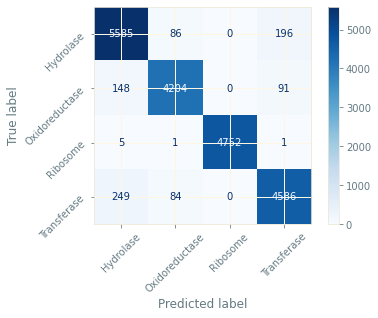

In [25]:
rf = RandomForestClassifier(n_estimators=60, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plt.figure(figsize=(10,8))
plot_confusion_matrix(rf,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

                precision    recall  f1-score   support

     Hydrolase       0.94      0.94      0.94      5867
Oxidoreductase       0.94      0.95      0.95      4443
      Ribosome       1.00      1.00      1.00      4759
   Transferase       0.93      0.93      0.93      4919

      accuracy                           0.95     19988
     macro avg       0.95      0.95      0.95     19988
  weighted avg       0.95      0.95      0.95     19988



<Figure size 720x576 with 0 Axes>

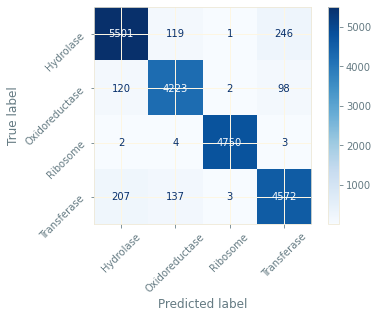

In [26]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(10,8))
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

                precision    recall  f1-score   support

     Hydrolase       0.38      0.86      0.53      5867
Oxidoreductase       0.32      0.06      0.10      4443
      Ribosome       0.92      0.90      0.91      4759
   Transferase       0.13      0.03      0.05      4919

      accuracy                           0.49     19988
     macro avg       0.44      0.46      0.40     19988
  weighted avg       0.44      0.49      0.41     19988



<Figure size 720x576 with 0 Axes>

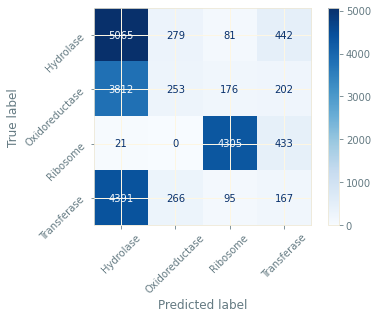

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
plt.figure(figsize=(10,8))
plot_confusion_matrix(gnb,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))

                precision    recall  f1-score   support

     Hydrolase       0.39      0.95      0.55      5867
Oxidoreductase       0.52      0.04      0.07      4443
      Ribosome       0.93      0.98      0.95      4759
   Transferase       0.30      0.01      0.02      4919

      accuracy                           0.52     19988
     macro avg       0.53      0.50      0.40     19988
  weighted avg       0.52      0.52      0.41     19988



<Figure size 720x576 with 0 Axes>

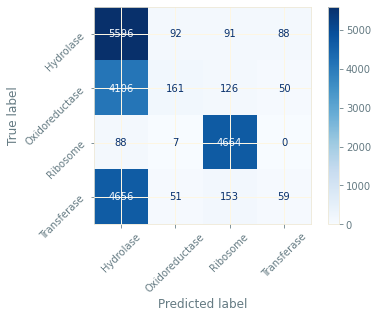

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=42,C=1,solver='liblinear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plt.figure(figsize=(10,8))
plot_confusion_matrix(clf,X_test,y_test,cmap=plt.cm.Blues, values_format = '.5g', display_labels = ["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"])
plt.xticks(rotation=45)
plt.yticks(rotation=45)
print(classification_report(y_test, y_pred, target_names=["Hydrolase","Oxidoreductase", "Ribosome", "Transferase"]))